In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # No missing values, no need for data imputation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Many columns in the dataset have a minimum value of 0, which is biologically impossible for features like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`. These zeros likely represent missing values. We will replace these zeros with `NaN` (Not a Number) to correctly handle them.

In [5]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_cleaned = df.copy() # Create a copy to avoid modifying the original DataFrame directly

for col in columns_with_zeros:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

print("Number of NaN values after replacing 0s:")
display(df_cleaned[columns_with_zeros].isnull().sum().to_frame(name='NaN Count'))

Number of NaN values after replacing 0s:


,NaN Count
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [6]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [7]:
df_cleaned.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# EDA

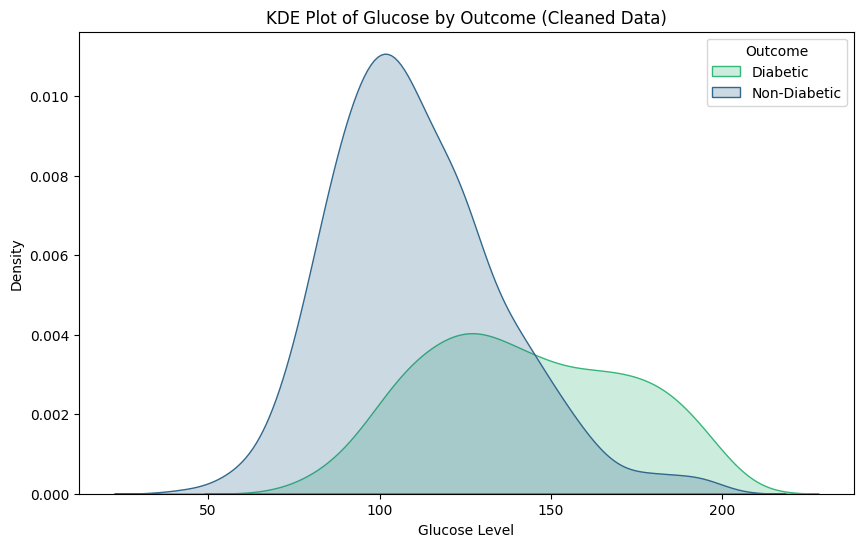

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='Glucose', hue='Outcome', fill=True, palette='viridis')
plt.title('KDE Plot of Glucose by Outcome (Cleaned Data)')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.show()

Peak for diabetic patients has shifted to the right, indicating that the avg glucose for diabetic patients is higher in daibetic patients compared to non-diabetic patients.
While there's a clear distinction, the two distributions still overlap. This means there are some non-diabetic individuals with relatively high glucose levels and, conversely, some diabetic individuals with glucose levels that fall within the range of non-diabetics. These overlapping regions represent borderline cases or individuals who might be pre-diabetic or have other factors influencing their outcome.

/tmp/ipython-input-3782615534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome', y='BMI', palette='plasma', ax=axes[0])
/tmp/ipython-input-3782615534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome', y='Glucose', palette='viridis', ax=axes[1])
/tmp/ipython-input-3782615534.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Outcome', y='Insulin', palette='cividis', ax=axes[2])


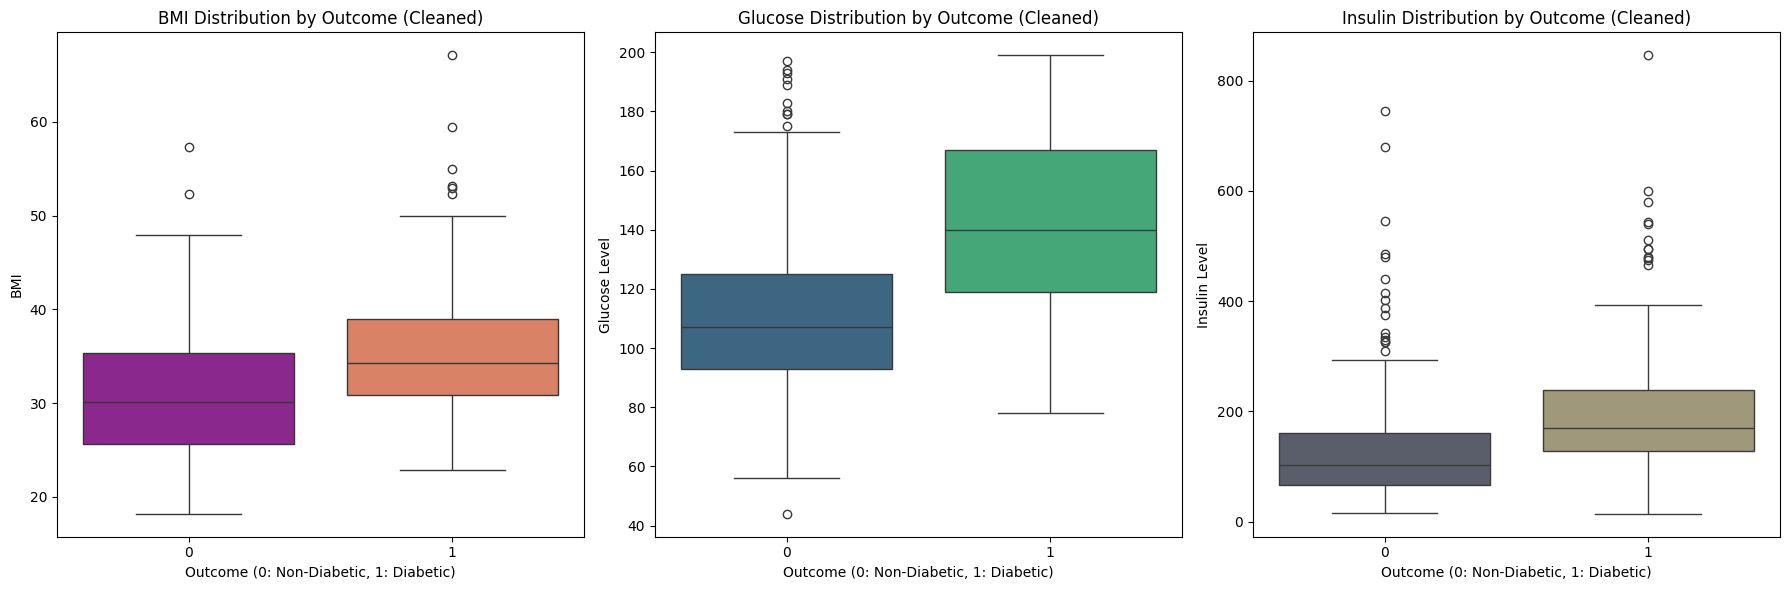

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

sns.boxplot(data=df_cleaned, x='Outcome', y='BMI', palette='plasma', ax=axes[0])
axes[0].set_title('BMI Distribution by Outcome (Cleaned)')
axes[0].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[0].set_ylabel('BMI')

sns.boxplot(data=df_cleaned, x='Outcome', y='Glucose', palette='viridis', ax=axes[1])
axes[1].set_title('Glucose Distribution by Outcome (Cleaned)')
axes[1].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[1].set_ylabel('Glucose Level')

sns.boxplot(data=df_cleaned, x='Outcome', y='Insulin', palette='cividis', ax=axes[2])
axes[2].set_title('Insulin Distribution by Outcome (Cleaned)')
axes[2].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[2].set_ylabel('Insulin Level')

plt.tight_layout()
plt.show()

These plots tell us that the median BMI, Glucose and Insulin is higher in diabetes patients compared to non-diabetic patients.

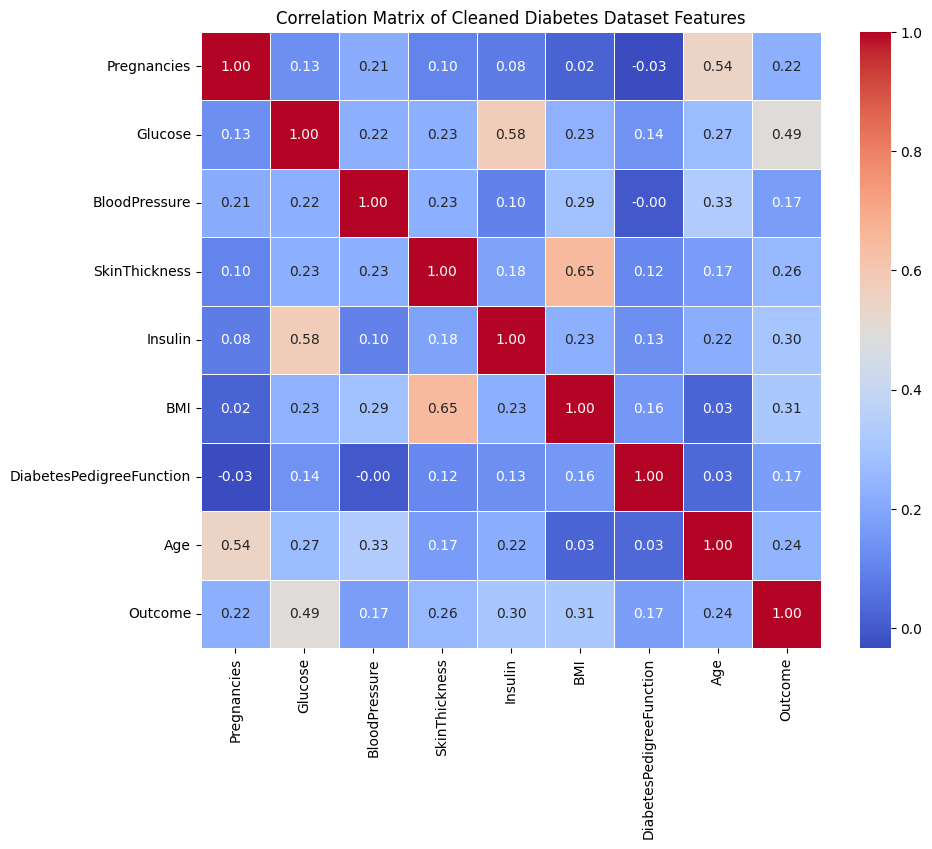

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix_cleaned = df_cleaned.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Cleaned Diabetes Dataset Features')
plt.show()

The heatmap tells us that features such as glucose, BMI and Age have a higher correlation with the outcome column compared to other factors such as pregnancy, BloodPressure and SkinThickness

## Model Building

In [14]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [24]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['liblinear', 'lbfgs', 'saga']
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=kfold,
                           scoring=['accuracy', 'f1', 'recall', 'precision'],
                           refit='accuracy',
                           n_jobs=-1,
                           verbose=1)


In [25]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='accuracy',
             scoring=['accuracy', 'f1', 'recall', 'precision'], verbose=1)

In [26]:
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best hyperparameters found by GridSearchCV:
{'logreg__C': 1, 'logreg__solver': 'liblinear'}
Best cross-validation accuracy: 0.7899


In [27]:
from sklearn.metrics import classification_report

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



ROC-AUC Score on Test Set: 0.8128


<Figure size 800x600 with 0 Axes>

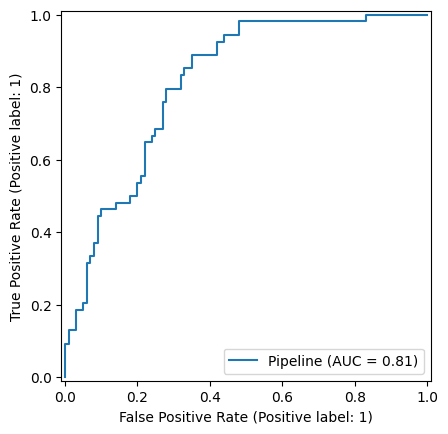

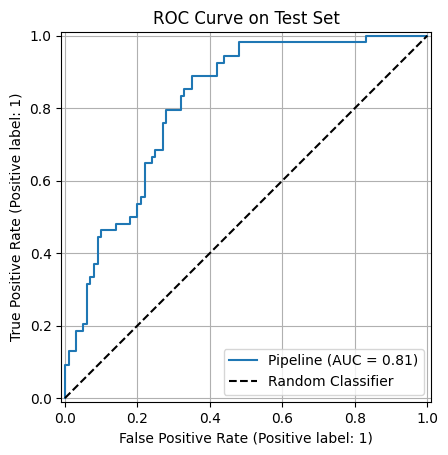

In [28]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1) on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score on Test Set: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test)
roc_display.plot()
plt.title('ROC Curve on Test Set')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Plot a random classifier baseline
plt.legend(loc='lower right')
plt.grid(True)
plt.show()